## Kifune plot 

Version : 2020-01-13  
Copyright 2019, Stephen Fegan <sfegan@llr.in2p3.fr>  
LLR, Ecole polytechnique, CNRS/IN2P3
This work is licensed under the CC AT-NC-SA 4.0 license - see LICENSE.md

Draw the "Kifune" plot - the integral number of high energy sources detected as a function of year - in the style of a plot developped by Tadashi Kifune (for example http://adsabs.harvard.edu/abs/1996NCimC..19..953K).

The data for the number of X-ray and HE (GeV) gamma-ray sources come from a page on HEASARC maintained by Stephen A. Drake (retrieved 2019-02-14) : https://heasarc.gsfc.nasa.gov/docs/heasarc/headates/how_many_xray.html

The data for the number of VHE (TeV) gamma-ray sources is from TeVCat maintained by Deirdre Horan and Scott Wakely  (retrieved 2019-02-14) : http://tevcat.uchicago.edu/

Note : the source count plots exclude the Sun (detected in X rays in the 1940s).

In [1]:
%pylab inline
import copy

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_data(data, color, label=None, label_cutoff = None):
    x = list(map(lambda x: x[0], data))
    y = list(map(lambda x: x[1], data))
    semilogy(x,y,color+'.-',label=label)
    for isrc in data:
        if len(isrc)>2 and isrc[2] is not None and ( label_cutoff is None or isrc[1]<label_cutoff ):
            prop = dict( ha = 'left', va = 'top')
            if len(isrc)>3:
                prop = copy.deepcopy(isrc[3])
            dx = 0.5
            dy = -0.05
            if 'dx' in prop:
                dx = prop['dx']
                del prop['dx']
            if 'dy' in prop:
                dy = prop['dy']
                del prop['dy']
            text(isrc[0]+dx, isrc[1]*10**dy, isrc[2], **prop)

In [3]:
xray = [ #[ 1962,       1, 'Giacconi et al.\n(Sco X-1)', dict(ha='center', va='top', dy=-0.1) ],
         [ 1962,       1, 'Giacconi et al. (Sco X-1)', dict(ha='right', va='bottom', rotation='vertical', dx=-0.5 ) ],
         [ 1965,      10, 'Sounding\nrockets' ],
         [ 1970,      60, 'Rockets and\nballoons' ],         
         [ 1972,     125, 'Uhuru (2U)' ],
         [ 1978,     339, 'Uhuru (4U)' ],
#         [ 1982,     677, 'Amnuel et al.' ],
         [ 1984,     840, 'HEAO A-1' ],
         [ 1990,    8000, 'Einstein & EXOSAT', dict(ha='right', va='bottom', dx=-0.5, dy=0.05 ) ],
         [ 2000,  340000, 'ROSAT' ],
#         [ 2010,  780000, 'ROSAT/XMM-Newton/Chandra' ],
         [ 2017, 1360000, 'ROSAT/XMM-Newton/Chandra', dict(ha='right', va='bottom', dy=0.05 ) ]
    ]

gev = [ [ 1970,        1, 'McBreen et al. (Crab)', dict(ha='center', va='top', dy=-0.1) ],
        [ 1973,        6, 'SAS-2' ],
        [ 1977,       13, 'COS-B (CG)' ],
        [ 1981,       25, 'COS-B (2CG)' ],
#        [ 1994,       50, 'EGRET (1EG)' ],
        [ 1995,      128, 'EGRET (2EG)' ],
        [ 1999,      270, 'EGRET (3EG)' ],
        [ 2002,      420, 'Macomb & Gehrels' ],
        [ 2010,     1451, 'Fermi/LAT\n(1FGL)' ],
        [ 2015,     3034, 'Fermi/LAT (3FGL)', dict(ha='right', va='bottom', dx=-0.75, dy=0.025) ], 
        [ 2019,     5064, 'Fermi/LAT\n(4FGL)', dict(ha='right', va='bottom', dy=+0.1) ], 
        [ 2020,     5788, 'Fermi/LAT\n(4FGL-DR2)', dict(ha='right', va='bottom', dy=+0.1) ] 
    ]

tev = [ [ 1989,   1, 'Whipple (Crab)', dict(ha='center', va='top', dy=-0.1) ],
        [ 1992,   2, 'Whipple (+Mrk 421)' ],
        [ 1996,   3, 'Whipple (+Mrk 501)' ],
        [ 1998,   4 ],
        [ 1999,   6 ],
        [ 2000,   8 ],
        [ 2001,  10, '      2nd generation IACTs\n   Whipple, HEGRA, CAT,\nCANGAROO, TA', 
                dict(ha='left', va='top', dx=-1.5, dy=-0.05)],
        [ 2002,  12 ],
        [ 2003,  13 ],
        [ 2004,  14 ],
        [ 2005,  30 ],
        [ 2006,  47 ],
        [ 2007,  66 ],
        [ 2008,  87 ],
        [ 2009, 107, '3rd generation IACTs\nHESS, MAGIC, VERITAS', dict(ha='center', va='top', dx=3.0, dy=0.2, rotation=35) ],
        [ 2010, 125 ],
        [ 2011, 139 ],
        [ 2012, 148 ],
        [ 2013, 151 ],
        [ 2014, 163 ],
        [ 2015, 176 ],
        [ 2016, 181 ],
        [ 2017, 210 ],
        [ 2018, 220 ],
        [ 2019, 225 ]
]

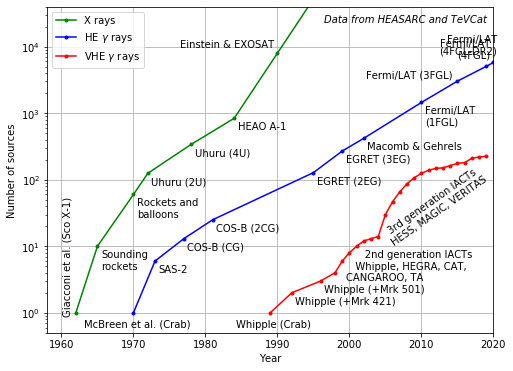

In [4]:
figure(figsize(8,6))
plot_data(xray,'g','X rays', label_cutoff=2e5)
plot_data(gev,'b','HE $\\gamma$ rays')
plot_data(tev,'r','VHE $\\gamma$ rays')
axis([1958, 2020,0.5,40000])
xlabel('Year')
ylabel('Number of sources')
text(0.985,0.975,
#     'Data from HEASARC (S. A. Drake) and TeVCat (Horan & Wakely)',
     'Data from HEASARC and TeVCat',
     style='oblique', transform = gca().transAxes, ha='right', va='top')
grid()
legend(loc=2)
savefig('kifune.pdf')
savefig('kifune.png',dpi=300)

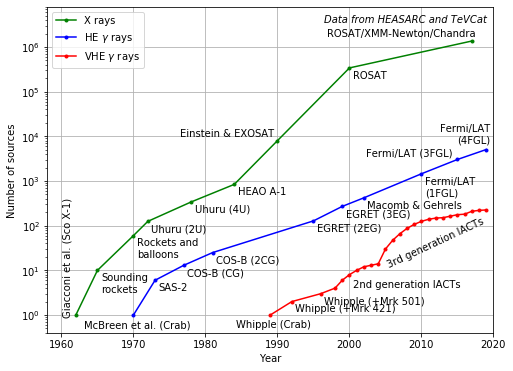

In [5]:
figure(figsize(8,6))
plot_data(xray,'g','X rays')
plot_data(gev,'b','HE $\\gamma$ rays')
tev_small = copy.deepcopy(tev)
tev_small[6][2] = '2nd generation IACTs'
tev_small[6][3] = dict(ha='left', va='top', dx=-0.5, dy=-0.2)
tev_small[14][2] = '3rd generation IACTs'
tev_small[14][3] = dict(ha='center', va='top', dx=3.0, dy=0.2, rotation=25)
plot_data(tev_small,'r','VHE $\\gamma$ rays')
axis([1958, 2020,0.4,8e6])
xlabel('Year')
ylabel('Number of sources')
text(0.985,0.975,
#     'Data from HEASARC (S. A. Drake) and TeVCat (Horan & Wakely)',
     'Data from HEASARC and TeVCat', 
     style='oblique', transform = gca().transAxes, ha='right', va='top')
grid()
legend(loc=2)
savefig('kifune_unzoomed.pdf')
savefig('kifune_unzoomed.png',dpi=300)